# Vector operators in SymPy


### Nicolás Guarín-Zapata
### October, 2017

In [1]:
from __future__ import division
from sympy import *

In [2]:
init_session()

IPython console for SymPy 1.0 (Python 2.7.13-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [3]:
def scale_coeff(r_vec, coords):
    """
    Compyte scale coefficients for the vector
    tranform given by r_vec.
    
    Parameters
    =======
    r_vec : Matrix (3, 1)
        Transform vector (x, y, z) as a functoin of coordinates
        u1, u2, u3.
    coords : Tupl (3)
        Coordinates for the new reference system.
        
    Returns
    ========
    h_vec : Tuple (3)
        Scale coefficients.
    """
    if type(r_vec) == list:
        r_vec = Matrix(r_vec)
    u1, u2, u3 = coords
    h1 = simplify((r_vec.diff(u1)).norm())
    h2 = simplify((r_vec.diff(u2)).norm())
    h3 = simplify((r_vec.diff(u3)).norm())
    return h1, h2, h3

As an example, the tranformation for Spherical coordinates.

In [4]:
r, theta, phi = symbols("r theta phi", positive=True)
h_vec = scale_coeff([r*sin(theta)*cos(phi),
                     r*sin(theta)*sin(phi),
                     r*cos(theta)],
                    [r, theta, phi])

In [5]:
h_vec

And, since $\theta$ is in $[0, \pi]$, the last component is $r \sin(\theta)$.

In [6]:
def grad(u, coords=(x, y, z), h_vec=(1, 1, 1)):
    """
    Compute the gradient of a scalara function phi.

    Parameters
    ==========
    u : SymPy expression
        Scalar function to compute the gradient from.
    coords : Tuple (3), optional
        Coordinates for the new reference system. This is an optional
        parameters, and it takes a cartesian (x, y, z), as default.
    h_vec : Tuple (3), optional
        Scale coefficients for the new coordinate system. It takes
        (1, 1, 1), as default.
        
    Returns
    ========
    gradient: Matrix (3, 1)
        Column vector with the components of the gradient.
    """
    return Matrix(3, 1, lambda i, j: u.diff(coords[i])/h_vec[j])

Let's see an example.

In [7]:
grad(-(cos(x)**2 + cos(y)**2)**2)

⎡  ⎛   2         2   ⎞              ⎤
⎢4⋅⎝cos (x) + cos (y)⎠⋅sin(x)⋅cos(x)⎥
⎢                                   ⎥
⎢  ⎛   2         2   ⎞              ⎥
⎢4⋅⎝cos (x) + cos (y)⎠⋅sin(y)⋅cos(y)⎥
⎢                                   ⎥
⎣                 0                 ⎦

In [8]:
def grad_vec(A, coords=(x, y, z), h_vec=(1, 1, 1)):
    """
    Gradient of a vector function A.
    
    Parameters
    ==========
    A : Matrix (3, 1), list
        Vector function to compute the gradient from.
    coords : Tuple (3), optional
        Coordinates for the new reference system. This is an optional parameter
        it takes (x, y, z) as default.
    h_vec : Tuple (3), optional
        Scale coefficients for the new coordinate system. It takes
        (1, 1, 1), as default.
        
    Returns
    =======
    gradient: Matrix (3, 3)
        Matrix with the components of the gradient. The position (i, j) has as components
        diff(A[i], coords[j].
    """ 
    return Matrix(3, 3, lambda i, j: (S(1)/h_vec[j])*A[i].diff(coords[j]))

Let's see a simple example.

In [9]:
grad_vec([x*y*z, x*y*z, x*y*z])

⎡y⋅z  x⋅z  x⋅y⎤
⎢             ⎥
⎢y⋅z  x⋅z  x⋅y⎥
⎢             ⎥
⎣y⋅z  x⋅z  x⋅y⎦

In [10]:
def div(A, coords=(x, y, z), h_vec=(1, 1, 1)):
    """
    Divergence of the vector function A.
    
    Parameters
    ==========
    A : Matrix, list
        Scalar function to compute the divergence from.
    coords : Tuple (3), optional
        Coordinates for the new reference system. This is an optional parameter
        it takes (x, y, z) as default.
    h_vec : Tuple (3), optional
        Scale coefficients for the new coordinate system. It takes
        (1, 1, 1), as default.
        
    Returns
    ========
    divergence: SymPy expression
        Divergence of A.
    """  
    h = h_vec[0]*h_vec[1]*h_vec[2]
    aux = simplify((S(1)/h)*sum(diff(A[k]*h/h_vec[k], coords[k])
                                for k in range(3)))
    return aux 

Let's see a simple example.

In [11]:
div([x**2 + y*z, y**2+x*z, z**2 + x*y])

In [12]:
def curl(A, coords=(x, y, z), h_vec=(1, 1, 1)):
    """
    Curl of a function vector A.
    
    Parameters
    ==========
    A : Matrix, List
        Vector function to compute the curl from.
    coords : Tuple (3), optional
        Coordinates for the new reference system. This is an optional parameter
        it takes (x, y, z) as default.
    h_vec : Tuple (3), optional
        Scale coefficients for the new coordinate system. It takes
        (1, 1, 1), as default.

    Returns
    =======
    curl : Matrix (3, 1)
        Column vector with the curl of A.
    """  
    perm = lambda i, j, k: (i - j)*(j - k)*(k - i)/S(2)
    h = h_vec[0]*h_vec[1]*h_vec[2]
    aux = [(S(1)/h)*sum(perm(i, j, k)*h_vec[i]*diff(A[k]*h_vec[k], coords[j]) for j in range(3) for k in range(3))
           for i in range(3)]
    return Matrix(aux)  

Let's see an example.

In [13]:
curl([0, -x**2, 0])

⎡ 0  ⎤
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎣-2⋅x⎦

In [14]:
def lap(u, coords=(x, y, z), h_vec=(1, 1, 1)):
    """
    Laplacian of the scalar function phi.
    
    Parameters
    ==========
    u : SymPy expression
        Scalar function to compute the gradient from.
    coords : Tuple (3), optional
        Coordinates for the new reference system. This is an optional
        parameters, and it takes a cartesian (x, y, z), as default.
    h_vec : Tuple (3), optional
        Scale coefficients for the new coordinate system. It takes
        (1, 1, 1), as default.
        
    Returns
    =======
    laplacian: Sympy expression
        Laplacian of phi.
    """
    h = h_vec[0]*h_vec[1]*h_vec[2]
    return sum([1/h*diff(h/h_vec[k]**2*u.diff(coords[k]), coords[k]) for k in range(3)])

Hagamos un ejemplo simple

In [15]:
lap(x**2 +  y**2 + z**2)

In [16]:
def lap_vec(A, coords=(x, y, z), h_vec=(1, 1, 1)):
    """
    Laplacian of a vector function A.
    
    Parameters
    ==========
    A : Matrix, List
        Vector function to compute the curl from.
    coords : Tuple (3), optional
        Coordinates for the new reference system. This is an optional parameter
        it takes (x, y, z) as default.
    h_vec : Tuple (3), optional
        Scale coefficients for the new coordinate system. It takes
        (1, 1, 1), as default.
        
    Devuelve
    ========
    laplacian : Matrix (3, 1)
        Column vector with the components of the Laplacian.
    """  
    return grad(div(A, coords=coords, h_vec=h_vec), coords=coords, h_vec=h_vec) -\
           curl(curl(A, coords=coords, h_vec=h_vec), coords=coords, h_vec=h_vec)

Let's check with an example.

In [17]:
lap_vec([x**2, y**2, z**2])

⎡2⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣2⎦

### Plate equation in polar coordinates

The equation of a plate in polar coordinates is given by
$D\nabla^4 w(\mathbf{x})  = -q(\mathbf{x})$, with $\nabla^4 u = \nabla^2 \nabla^2 u$.

In [18]:
w = symbols("w", cls=Function)
rho, phi, z = symbols("rho phi z", positive=True)
D, q = symbols("D q")

In [19]:
coords = (rho, phi, z)
h_vec = [1, rho, 1]

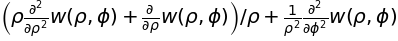

In [20]:
L1 = lap(w(rho, phi), coords=coords, h_vec=h_vec)
L1

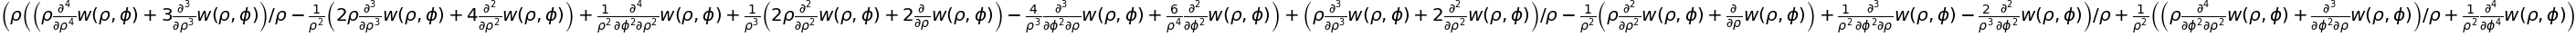

In [21]:
L2 = lap(L1, coords=coords, h_vec=h_vec)
L2

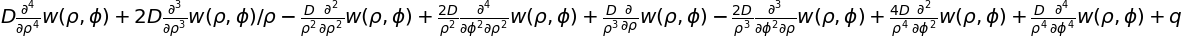

In [22]:
display(expand(D*L2 + q))